[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/htethtetaung10/Fruit-Image-Classification/blob/main/fruit-image-classification.ipynb)

**Fruit Image Classification**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
from sklearn import preprocessing
from pathlib import Path
from google.colab import drive

**Load the data from Google Drive**

In [ ]:
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!cp -r '/gdrive/My Drive/data/fruits' .

**Prepare train and test data**

In [ ]:
labels_train = []
labels_test = []
sample_train = []
sample_test = []

path_train = "fruits/train/"
path_test = "fruits/test/"

# separate the traing and test labels
for file in os.listdir(path_train):
    if(file.split('.')[1]=="jpg"):
        labels_train.append(file.split('_')[0])
        sample_train.append(os.path.join(path_train, file)) 

for file in os.listdir(path_test):
    if(file.split('.')[1]=="jpg"):
        labels_test.append(file.split('_')[0])
        sample_test.append(os.path.join(path_test, file))  

label_classes_train = np.unique(np.array(labels_train))
label_classes_test = np.unique(np.array(labels_test))
print("Labels: ", label_classes_train)
print("Number of train samples: ", len(sample_train))
print("Number of test samples: ", len(sample_test))

Labels:  ['apple' 'banana' 'mixed' 'orange']
Number of train samples:  240
Number of test samples:  60


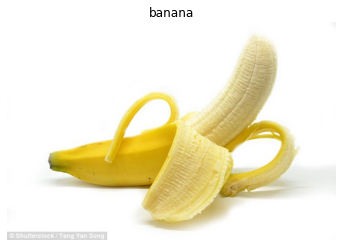

In [ ]:
# show a train sample image
image = cv2.imread(sample_train[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image)
plt.title(labels_train[0])
plt.axis('off')
plt.show()

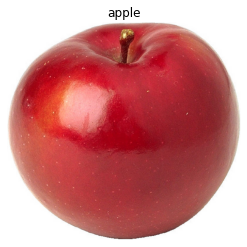

In [ ]:
# show a test sample image
image = cv2.imread(sample_test[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image)
plt.title(labels_test[0])
plt.axis('off')
plt.show()

**Prepare the images to train and evaluate the model**

In [ ]:
# prepare images for train and test samples
X_train = []
X_test = []

for sample in sample_train:
    image = cv2.imread(sample)    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image =  cv2.resize(image, (28,28))
    X_train.append(image)
    
X_train = np.array(X_train)   

for sample in sample_test:
    image = cv2.imread(sample)    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image =  cv2.resize(image, (28,28))
    X_test.append(image)
    
X_test = np.array(X_test) 

X_train = X_train / 255
X_test = X_test / 255

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (240, 28, 28, 3)
X_test shape:  (60, 28, 28, 3)


y_train shape:  (240, 4)
y_test shape:  (60, 4)
{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}
Length of X_train:  240


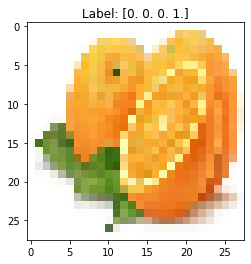

In [ ]:
# match the labels with numbers
fruits = {}
number_labels_train = []
number_labels_test = []

for i in range(len(label_classes_train)):
    fruits[label_classes_train[i]] = i 

for label in labels_train:
    number_labels_train.append(fruits.get(label))

for label in labels_test:
    number_labels_test.append(fruits.get(label))

y_train = tensorflow.keras.utils.to_categorical(number_labels_train, 4)
y_test = tensorflow.keras.utils.to_categorical(number_labels_test, 4)

print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print(fruits)
print("Length of X_train: ", len(X_train))
plt.imshow(X_train[50])
plt.title("Label: "+str(y_train[50]))
plt.show()

**Model creation**

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (28, 28, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding = 'same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))

**Compiling the model**

In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        36928     
                                                      

**Train the model**

Epoch 1/200
6/6 [==============================] - 1s 154ms/step - loss: 1.1144 - accuracy: 0.5260 - val_loss: 1.0696 - val_accuracy: 0.5208
Epoch 2/200
6/6 [==============================] - 1s 118ms/step - loss: 0.9485 - accuracy: 0.6146 - val_loss: 0.6974 - val_accuracy: 0.7917
Epoch 3/200
6/6 [==============================] - 1s 114ms/step - loss: 0.7428 - accuracy: 0.7031 - val_loss: 0.5519 - val_accuracy: 0.7917
Epoch 4/200
6/6 [==============================] - 1s 117ms/step - loss: 0.5922 - accuracy: 0.7812 - val_loss: 0.4323 - val_accuracy: 0.8542
Epoch 5/200
6/6 [==============================] - 1s 118ms/step - loss: 0.5718 - accuracy: 0.8125 - val_loss: 0.3107 - val_accuracy: 0.8542
Epoch 6/200
6/6 [==============================] - 1s 114ms/step - loss: 0.4584 - accuracy: 0.8646 - val_loss: 0.2842 - val_accuracy: 0.9167
Epoch 7/200
6/6 [==============================] - 1s 116ms/step - loss: 0.4519 - accuracy: 0.8594 - val_loss: 0.4149 - val_accuracy: 0.8333
Epoch 8/200
6

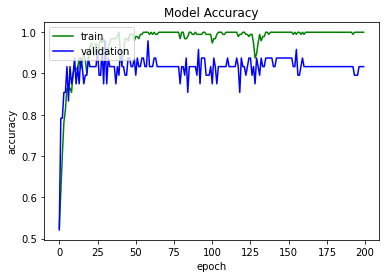

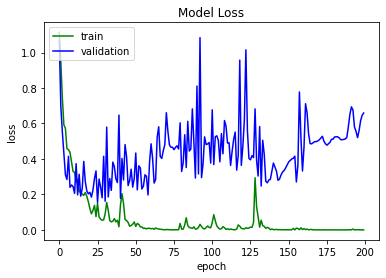

In [ ]:
# train the model
history = model.fit(X_train, y_train, batch_size = 32, epochs = 200, validation_split = 0.2, shuffle = True)

# visualise the model accuracy
plt.plot(history.history['accuracy'], label='train', color="green")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model Accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# visualise the model loss
plt.plot(history.history['loss'], label='train', color="green")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model Loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**Evaluate the model**

In [ ]:
score, accuracy = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', accuracy)

2/2 [==============================] - 0s 27ms/step - loss: 0.6737 - accuracy: 0.8833
Test score: 0.6737373471260071
Test accuracy: 0.8833333253860474


**Examining the predictions**

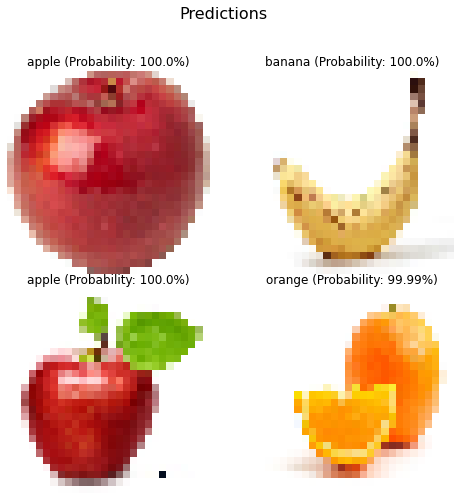

In [ ]:
predictions = model.predict(X_test)

figure, axs= plt.subplots(2,2, figsize=[8,8])
figure.subplots_adjust(hspace=0.01)
count=0
for i in range(2):    
    for j in range(2):  
        image = cv2.imread(sample_test[count])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        image = cv2.resize(image, (28,28))
        result = np.argsort(predictions[count])[::-1]
        
        max = -1
        max_value = ""
        for (key,value) in enumerate(fruits.keys()):
            if(predictions[count][key] > max):
                max = predictions[count][key]
                max_value = value
        
        title = str(max_value) + " (Probability: "+ str("{:.4}%".format(max*100)) + ")"
        axs[i][j].imshow(image)
        axs[i][j].set_title(title)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("Predictions", fontsize = 16)        
plt.show()